by  
Dasari Jayanth.  
Roll No. 2019BCS-016.

# Dataset

In [ ]:
import tensorflow as tf
from os import path, getcwd, chdir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
X = train_images
X.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

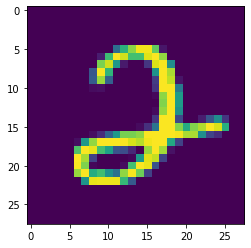

In [ ]:
X_=X.reshape(-1,28,28,1)
plt.imshow(X_[16,:,:,0])

In [ ]:
n_train, nx, ny = train_images.shape
train_images.shape

(60000, 28, 28)

In [ ]:
n_test, nx_t, ny_t = test_images.shape
test_images.shape

(10000, 28, 28)

The goal of PCA is to identify the components with maximum variance. Unnormalized data (e.g. different measurement units) can distort the relative comparison of variance across components.  [refer here](https://medium.com/deepdreaming/understanding-your-data-principal-component-analysis-86111bc9df37)

[reference1](https://towardsdatascience.com/deep-dive-into-principal-component-analysis-fc64347c4d20)  
[reference2](https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html)  
[reference3](https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22)

In [ ]:
# Preprocessing and Normalizing the data

# # Training Data
train_images = train_images.reshape((n_train, nx*ny))  # 3-D ==> 2-D
# train_images = train_images.astype('float32') / 255

# # Test Data
test_images  = test_images.reshape((n_test, nx_t*ny_t))
# test_images  = test_images.astype('float32') / 255

In [ ]:
#Normalize features:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_data_N = scaler.fit_transform(train_images)
print(train_data_N.shape)

test_data_N = scaler.fit_transform(test_images)
print(f"shape of test_data_N ==> {test_data_N.shape}")

(60000, 784)
shape of test_data_N ==> (10000, 784)


In [ ]:
sample_index = 16

# For M = 5 Components

In [ ]:
n_components = 5

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca_5 = PCA(n_components)
pca_5_transformed = pca_5.fit(train_data_N).transform(train_data_N)

In [ ]:
pca_5_  = PCA(n_components).fit(train_data_N) 
pca_5_.components_

array([[ 1.51535283e-19,  7.79547721e-22,  4.76819512e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-6.72102438e-17,  5.09123479e-18,  1.36002456e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.10152927e-17, -4.69121446e-18, -8.67569696e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.34464014e-17,  4.79997237e-17,  3.13525494e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.18702467e-17,  3.56935988e-17,  8.98743058e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

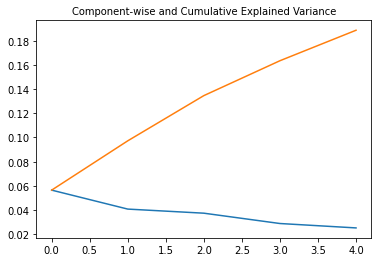

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_5.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_5.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_5_inverted = pca_5.inverse_transform(pca_5_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_5_inverted = pca_5_inverted.reshape(1,-1)

# unnormalize it
inv_5          = scaler.inverse_transform(pca_5_inverted)  

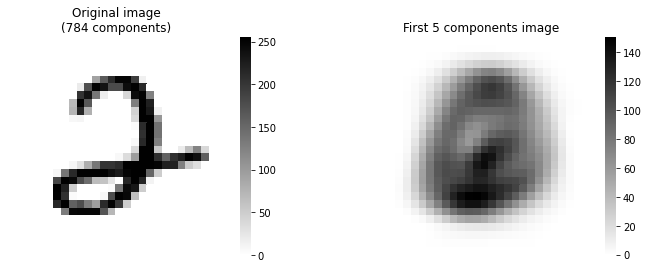

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_5.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 5 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

# For M = 10 Components 

In [ ]:
n_components = 10

In [ ]:
# Applying PCA

pca_10 = PCA(n_components)
pca_10_transformed = pca_10.fit(train_data_N).transform(train_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

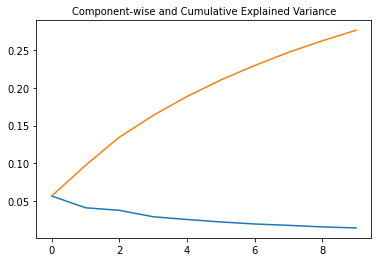

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_10.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_10.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_10_inverted = pca_10.inverse_transform(pca_10_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_10_inverted = pca_10_inverted.reshape(1,-1)

# unnormalize it
inv_10          = scaler.inverse_transform(pca_10_inverted)  

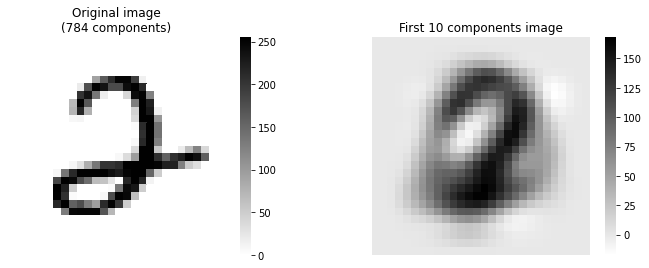

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_10.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 10 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

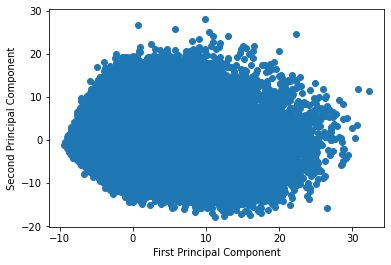

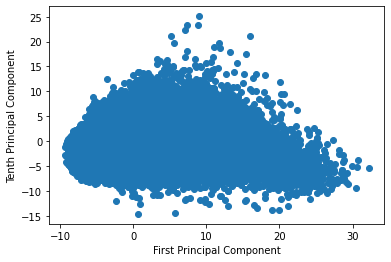

In [ ]:
plt.scatter(pca_10_transformed[:,0], pca_10_transformed[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
plt.scatter(pca_10_transformed[:,0], pca_10_transformed[:,9])
plt.xlabel('First Principal Component')
plt.ylabel('Tenth Principal Component')
plt.show()
# plt.scatter(pca_10_transformed[:,0], pca_10_transformed[:,19])
# plt.xlabel('First Principal Component')
# plt.ylabel('Twentieth Principal Component')
# plt.show()

# Like this can be represented for all n components and for all the below cases.

# For M = 25 Components

In [ ]:
n_components = 25

In [ ]:
# Applying PCA

pca_25 = PCA(n_components)
pca_25_transformed = pca_25.fit(train_data_N).transform(train_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

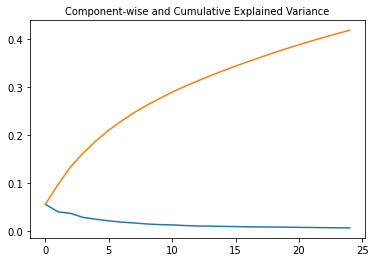

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_25.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_25.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_25_inverted = pca_25.inverse_transform(pca_25_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_25_inverted = pca_25_inverted.reshape(1,-1)

# unnormalize it
inv_25          = scaler.inverse_transform(pca_25_inverted)  

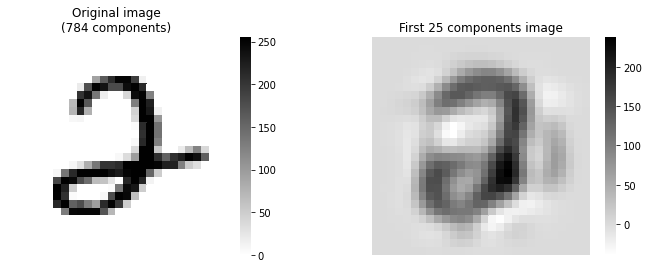

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_25.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 25 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

# For M = 64 Components

In [ ]:
n_components = 64

In [ ]:
# Applying PCA 

pca_64 = PCA(n_components)
pca_64_transformed = pca_64.fit(train_data_N).transform(train_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

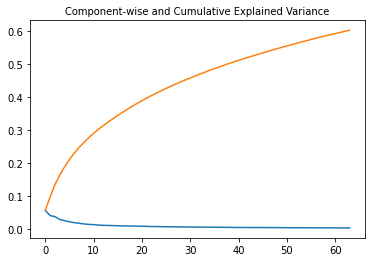

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_64.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_64.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_64_inverted = pca_64.inverse_transform(pca_64_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_64_inverted = pca_64_inverted.reshape(1,-1)

# unnormalize it
inv_64          = scaler.inverse_transform(pca_64_inverted)  

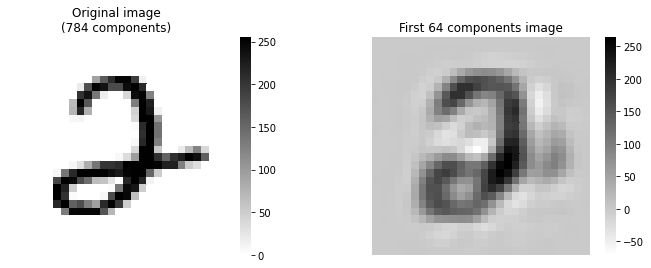

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_64.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 64 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

# For M = 100 Components

In [ ]:
n_components = 100

In [ ]:
# Applying PCA 

pca_100 = PCA(n_components)
pca_100_transformed = pca_100.fit(train_data_N).transform(train_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

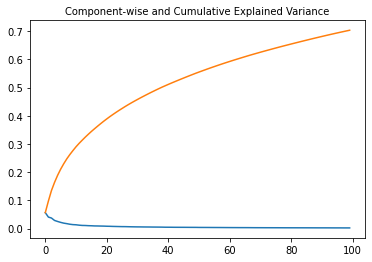

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_100.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_100.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_100_inverted = pca_100.inverse_transform(pca_100_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_100_inverted = pca_100_inverted.reshape(1,-1)

# unnormalize it
inv_100          = scaler.inverse_transform(pca_100_inverted)  

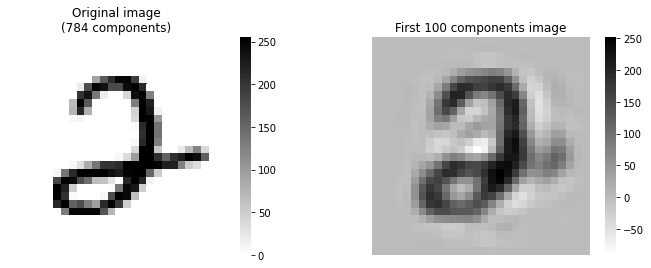

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_100.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 100 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

# For M = 200 Components

In [ ]:
n_components = 200

In [ ]:
# Applying PCA 

pca_200 = PCA(n_components)
pca_200_transformed = pca_200.fit(train_data_N).transform(train_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

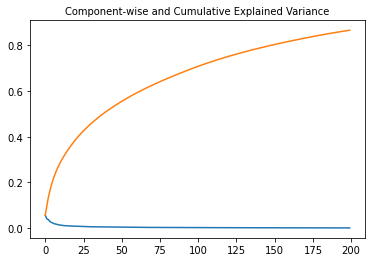

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_200.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_200.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_200_inverted = pca_200.inverse_transform(pca_200_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_200_inverted = pca_200_inverted.reshape(1,-1)

# unnormalize it
inv_200          = scaler.inverse_transform(pca_200_inverted)  

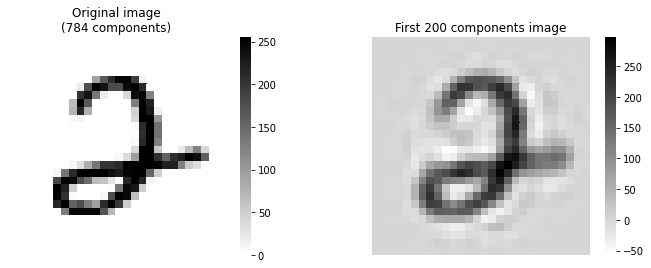

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_200.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 200 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

# For M = 784 Components

In [ ]:
n_components = 784

In [ ]:
# Applying PCA 

pca_784 = PCA(n_components)
pca_784_transformed = pca_784.fit(train_data_N).transform(train_data_N)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

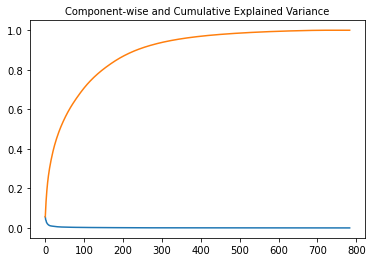

In [ ]:
#Plot Component-wise and Cumulative Explained Variance:
plt.subplot(1, 1, 1)
plt.plot(range(n_components), pca_784.explained_variance_ratio_)
plt.plot(range(n_components), np.cumsum(pca_784.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance", fontsize=10)

In [ ]:
#Invert the PCA to obtain the image with the new components:
pca_784_inverted = pca_784.inverse_transform(pca_784_transformed[sample_index, :])

# Reshape it since contains data of single sample
pca_784_inverted = pca_784_inverted.reshape(1,-1)

# unnormalize it
inv_784          = scaler.inverse_transform(pca_784_inverted)  

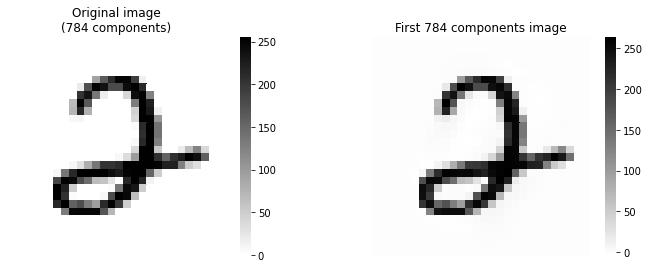

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_784.reshape(28, 28), cmap='gray_r', ax=axarr[1])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title("First 784 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')

plt.show()

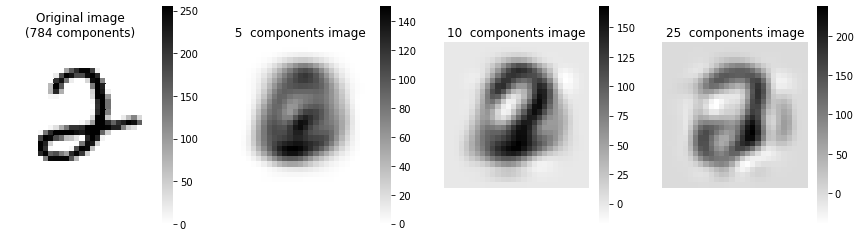

In [ ]:
#Plot images:
fig, axarr = plt.subplots(1, 4, figsize=(15, 4))

sns.heatmap(train_images[sample_index, :].reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(  inv_5.reshape(28, 28), cmap='gray_r', ax=axarr[1])
sns.heatmap( inv_10.reshape(28, 28), cmap='gray_r', ax=axarr[2])
sns.heatmap( inv_25.reshape(28, 28), cmap='gray_r', ax=axarr[3])

axarr[0].set_title("Original image\n({} components)".format(train_images.shape[1]), fontsize=12)
axarr[1].set_title(" 5  components image", fontsize=12)
axarr[2].set_title("10  components image", fontsize=12)
axarr[3].set_title("25  components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')
axarr[2].set_aspect('equal')
axarr[3].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[3].axis('off')

plt.show()

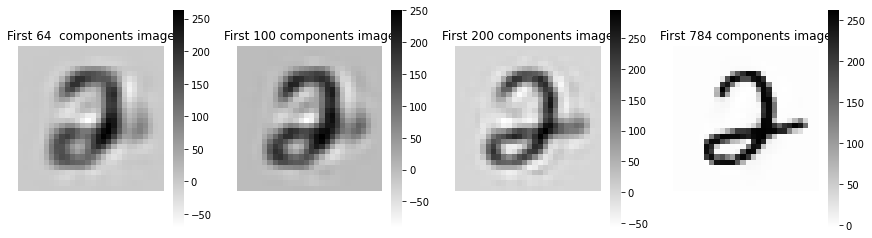

In [ ]:
#Plot images continuation:
fig, axarr = plt.subplots(1, 4, figsize=(15, 4))

sns.heatmap( inv_64.reshape(28, 28), cmap='gray_r', ax=axarr[0])
sns.heatmap(inv_100.reshape(28, 28), cmap='gray_r', ax=axarr[1])
sns.heatmap(inv_200.reshape(28, 28), cmap='gray_r', ax=axarr[2])
sns.heatmap(inv_784.reshape(28, 28), cmap='gray_r', ax=axarr[3])

axarr[0].set_title("First 64  components image", fontsize=12)
axarr[1].set_title("First 100 components image", fontsize=12)
axarr[2].set_title("First 200 components image", fontsize=12)
axarr[3].set_title("First 784 components image", fontsize=12)

axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')
axarr[2].set_aspect('equal')
axarr[3].set_aspect('equal')

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[3].axis('off')

plt.show()

In [ ]:
#find the co-variance matrix which is : A^T * A
sample_data = train_data_N
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [ ]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [ ]:
n_components = 25
pca = PCA(n_components= n_components).fit(train_images)
eigenvalues = pca.components_
n_row = 5
n_col = 5
# # Visualizing first 25 eigenvectors through their eigenvalues
# plt.figure(figsize=(13,12))
# for i in list(range(n_row * n_col)):
#   offset =0
#   plt.subplot(n_row, n_col, i + 1)
#   plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
#   title_text = 'Eigenvalue ' + str(i + 1)
#   plt.title(title_text, size=6.5)
#   plt.xticks(())
#   plt.yticks(())
#   plt.show()


In [ ]:
# import plotly.express as px
# pca_200_ = PCA(n_components = 200)
# components = pca.fit_transform(train_images)
# labels = {
#     str(i): f"PC {i+1} ({var:.1f}%)"
#     for i, var in enumerate(pca.explained_variance_ratio_ * 100)
# }

# fig = px.scatter_matrix(
#     components,
#     labels=labels,
#     dimensions=range(2),
#     color=train_labels
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

In [ ]:
# plt.style.use('seaborn-whitegrid')
# plt.figure(figsize = (10,6))
# c_map = plt.cm.get_cmap('jet', 10)
# plt.scatter(pca_200_[:, 0], pca_200_[:, 1], s = 15,
#             cmap = c_map , c = train_labels)
# plt.colorbar()
# plt.xlabel('PC-1') , plt.ylabel('PC-2')
# plt.show()

In [ ]:
# img_compressed = (np.dstack((pca_200_inverted, pca_64_inverted, pca_64_inverted))).astype(np.uint8)

In [ ]:
# plt.imshow(pca_200[])

In [ ]:
# pca = PCA(n_components=5)
# components = pca.fit_transform(train_images)

# fig = px.scatter(components, x=0, y=1, color=train_labels)
# fig.show()

In [ ]:
# m , n = components.shape
# components = components.reshape(-1,n*n)

In [ ]:
# plt.imshow(components)

# MSE

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
n_components = [5, 10, 25, 64, 100, 200, 784]    
mse_n = []
for n in n_components:
  pca      = PCA(n_components=n)
  inv      = pca.inverse_transform(pca.fit_transform(train_data_N))
  sum_rmse = 0
  for i in range(60000):
    rmse     = mean_squared_error(train_data_N[i], inv[i],squared=False)
    sum_rmse = sum_rmse + rmse
  mean_rmse = sum_rmse/60000
  print(f"For {n} components, MSE is ==> {mean_rmse}")
  mse_n.append(mean_rmse)

For 5 components, MSE is ==> 0.7220810047564609
For 10 components, MSE is ==> 0.6673554304918081
For 25 components, MSE is ==> 0.5760965377133316
For 64 components, MSE is ==> 0.4715788057064229
For 100 components, MSE is ==> 0.42205257356135023
For 200 components, MSE is ==> 0.30690526596058737
For 784 components, MSE is ==> 2.5498910017030907e-15


# Auto-Encoder & Decoder
  
[refer here](https://reckoning.dev/blog/autoencoders/#deep-autoencoders)

In [ ]:
from tensorflow.keras import layers, losses
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [ ]:
def display_reconstructed(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            # display reconstruction
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

# For M = 5

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(5, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
Model.summary

<function keras.engine.training.Model.summary>

Epoch 1/25
1875/1875 [==============================] - 15s 6ms/step - loss: 0.8173 - val_loss: 0.6998
Epoch 2/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7539 - val_loss: 0.6880
Epoch 3/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7439 - val_loss: 0.6805
Epoch 4/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7372 - val_loss: 0.6744
Epoch 5/25
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7304 - val_loss: 0.6688
Epoch 6/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7241 - val_loss: 0.6623
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7182 - val_loss: 0.6580
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7139 - val_loss: 0.6542
Epoch 9/25
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7111 - val_loss: 0.6518
Epoch 10/25
1875/1875 [==============================] - 11s 6ms/step - l

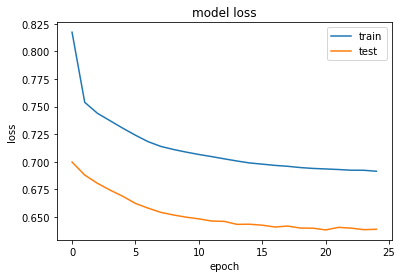

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history = autoencoder.fit(train_data_N, train_data_N,
                epochs=25,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history)

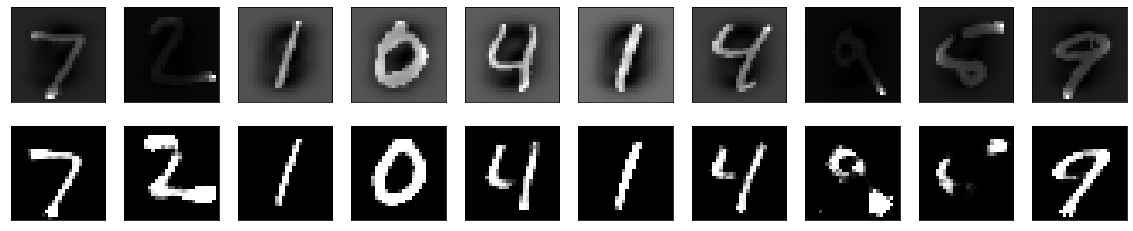

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

# For M = 10

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Epoch 1/25
1875/1875 [==============================] - 15s 7ms/step - loss: 0.9153 - val_loss: 0.8520
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 9/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 10/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

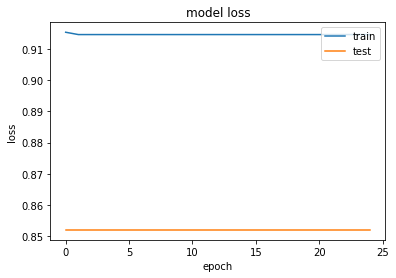

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_10 = autoencoder.fit(train_data_N, train_data_N,
                epochs=25,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history_10)

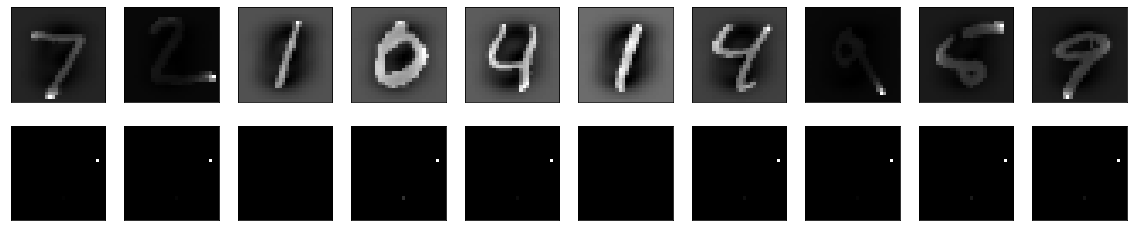

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

# For M = 25

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(25, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Epoch 1/25
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9153 - val_loss: 0.8520
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 9/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0

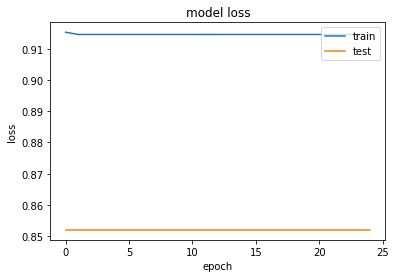

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_25 = autoencoder.fit(train_data_N, train_data_N,
                epochs=25,
                batch_size = 512,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history_25)

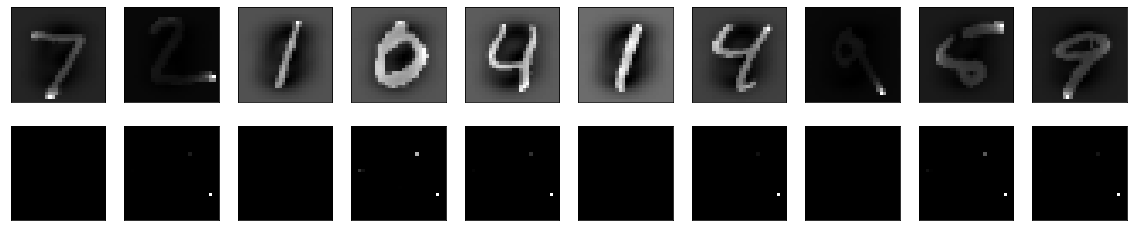

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

# For M = 64

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Epoch 1/25
118/118 [==============================] - 2s 12ms/step - loss: 0.9158 - val_loss: 0.8533
Epoch 2/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9158 - val_loss: 0.8533
Epoch 3/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9158 - val_loss: 0.8533
Epoch 4/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9158 - val_loss: 0.8533
Epoch 5/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9158 - val_loss: 0.8533
Epoch 6/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9168 - val_loss: 0.8367
Epoch 7/25
118/118 [==============================] - 1s 10ms/step - loss: 0.8243 - val_loss: 0.7103
Epoch 8/25
118/118 [==============================] - 1s 10ms/step - loss: 0.7514 - val_loss: 0.6752
Epoch 9/25
118/118 [==============================] - 1s 10ms/step - loss: 0.7252 - val_loss: 0.6542
Epoch 10/25
118/118 [==============================] - 1s 11ms/step - loss: 0.7079 - val_lo

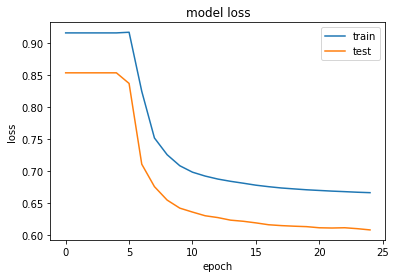

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_64 = autoencoder.fit(train_data_N, train_data_N,
                epochs=25 ,
                batch_size=512,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history_64)

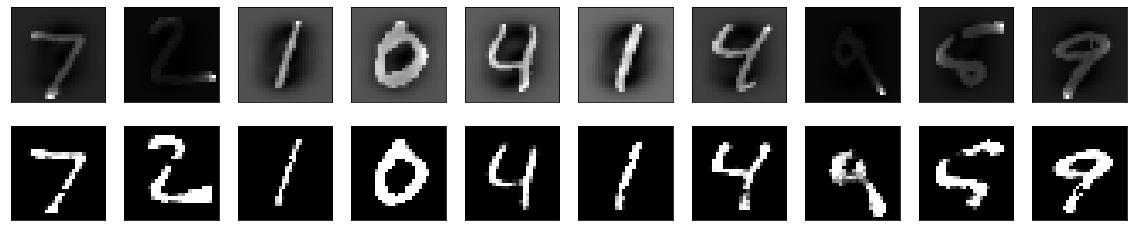

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

# For M = 100

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(100, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder_100 = Model(input_img, decoded)

Epoch 1/25
59/59 [==============================] - 3s 32ms/step - loss: 0.9341 - val_loss: 0.8520
Epoch 2/25
59/59 [==============================] - 1s 20ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 3/25
59/59 [==============================] - 1s 20ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 4/25
59/59 [==============================] - 1s 19ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 5/25
59/59 [==============================] - 1s 16ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 6/25
59/59 [==============================] - 1s 15ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 7/25
59/59 [==============================] - 1s 14ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 8/25
59/59 [==============================] - 1s 14ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 9/25
59/59 [==============================] - 1s 14ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 10/25
59/59 [==============================] - 1s 14ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 11/

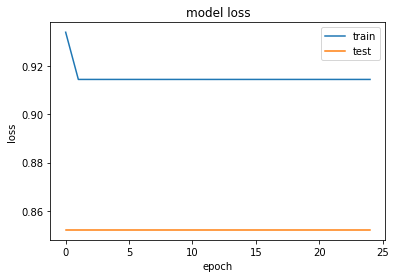

In [ ]:
autoencoder_100.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_100 = autoencoder_100.fit(train_data_N, train_data_N,
                epochs=25,
                batch_size = 1024,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history_100)

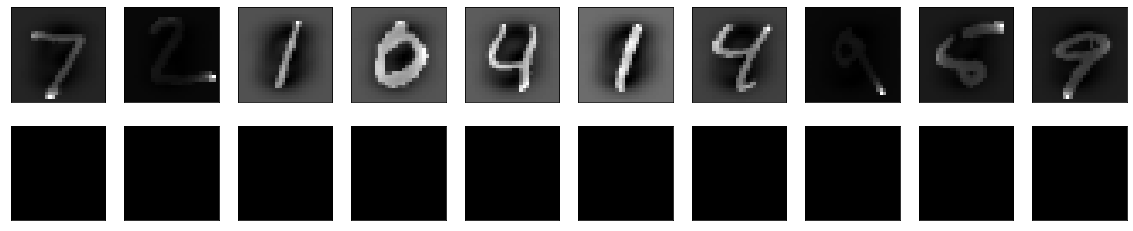

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

# For M = 200

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(400, activation='relu')(encoded)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(200, activation='relu')(encoded)

decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(400, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Epoch 1/25
118/118 [==============================] - 2s 14ms/step - loss: 0.9245 - val_loss: 0.8520
Epoch 2/25
118/118 [==============================] - 1s 12ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 3/25
118/118 [==============================] - 1s 12ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 4/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 5/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 6/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 7/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 8/25
118/118 [==============================] - 1s 10ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 9/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 10/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_lo

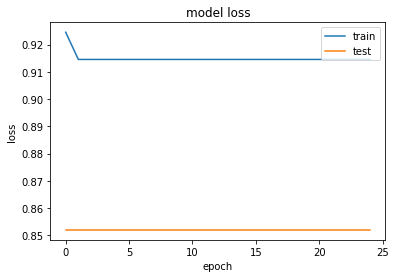

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_200 = autoencoder.fit(train_data_N, train_data_N,
                epochs=25,
                batch_size =512,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history_200)

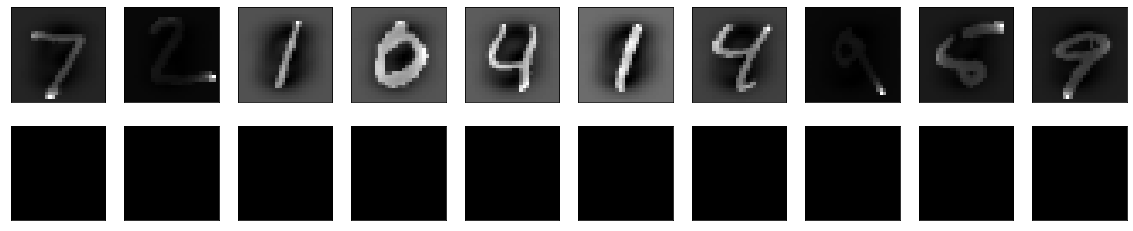

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

# For M = 784

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(784, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

Epoch 1/25
118/118 [==============================] - 2s 13ms/step - loss: 0.9252 - val_loss: 0.8520
Epoch 2/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 3/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 4/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 5/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 6/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 7/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 8/25
118/118 [==============================] - 1s 11ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 9/25
118/118 [==============================] - 1s 10ms/step - loss: 0.9145 - val_loss: 0.8520
Epoch 10/25
118/118 [==============================] - 1s 10ms/step - loss: 0.9145 - val_lo

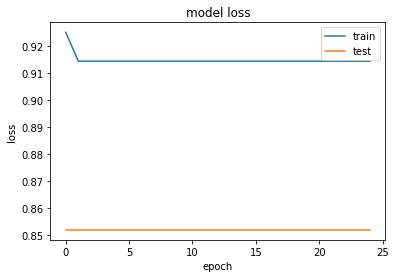

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
history_784 = autoencoder.fit(train_data_N, train_data_N,
                epochs=25,
                batch_size =512,
                shuffle=True,
                validation_data=(test_data_N, test_data_N))

plot_train_history_loss(history_784)

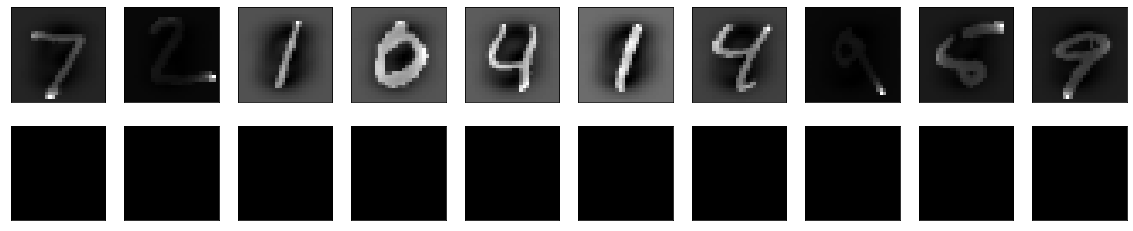

In [ ]:
decoded_imgs = autoencoder.predict(test_data_N)
display_reconstructed(test_data_N, decoded_imgs, 10)

In [ ]:
print("For 5 components")
print(f" PCA==>  {mse_n[0]}, Auto-Encoder==> {history.history['loss'][-1]}")

 PCA==>  0.7220810047564609, Auto-Encoder==> 0.6914426684379578


In [ ]:
print("For 5 components")
print(f" PCA==>  {mse_n[1]}, Auto-Encoder==> {history_10.history['loss'][-1]}")

For 5 components
 PCA==>  0.6673554304918081, Auto-Encoder==> 0.9145407676696777


In [ ]:
print("For 5 components")
print(f" PCA==>  {mse_n[2]}, Auto-Encoder==> {history_25.history['loss'][-1]}")

For 5 components
 PCA==>  0.5760965377133316, Auto-Encoder==> 0.9145405888557434


In [ ]:
print("For 5 components")
print(f" PCA==>  {mse_n[3]}, Auto-Encoder==> {history_64.history['loss'][-1]}")

For 5 components
 PCA==>  0.4715788057064229, Auto-Encoder==> 0.6657440066337585


In [ ]:
print("For 5 components")
print(f" PCA==>  {mse_n[4]}, Auto-Encoder==> {history_100.history['loss'][-1]}")

For 5 components
 PCA==>  0.42205257356135023, Auto-Encoder==> 0.9145406484603882


In [ ]:
print("For 5 components")
print(f" PCA==>  {mse_n[5]}, Auto-Encoder==> {history_200.history['loss'][-1]}")

For 5 components
 PCA==>  0.30690526596058737, Auto-Encoder==> 0.9145408272743225


In [ ]:
print("For 784 components")
print(f" PCA==>  {mse_n[6]}, Auto-Encoder==> {history_784.history['loss'][-1]}")

For 784 components
 PCA==>  2.5498910017030907e-15, Auto-Encoder==> 0.9145408272743225


# I haven't Fine Tuned the parameters for Autoencoder part of the assignment except for 3 different component values. So, I got the same loss and validation_loss after sometime, Which can be changed by implementing regularizations, hyperparameter tuning etc.
